<a href="https://colab.research.google.com/github/majdsuleiman98/HeartDisease/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/heart_2020_cleaned.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [ ]:
df.shape

(319795, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [ ]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [ ]:
df["HeartDisease"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [ ]:
df["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
df.Race.unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
df.Diabetic.unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [ ]:
df.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [ ]:
df.SleepTime.unique()

array([ 5.,  7.,  8.,  6., 12.,  4.,  9., 10., 15.,  3.,  2.,  1., 16.,
       18., 14., 20., 11., 13., 17., 24., 19., 21., 22., 23.])

In [ ]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

(array([1.72840e+04, 1.72106e+05, 1.00863e+05, 2.33270e+04, 4.88800e+03,
        9.37000e+02, 2.61000e+02, 8.70000e+01, 2.90000e+01, 1.30000e+01]),
 array([12.02 , 20.303, 28.586, 36.869, 45.152, 53.435, 61.718, 70.001,
        78.284, 86.567, 94.85 ]),
 <BarContainer object of 10 artists>)

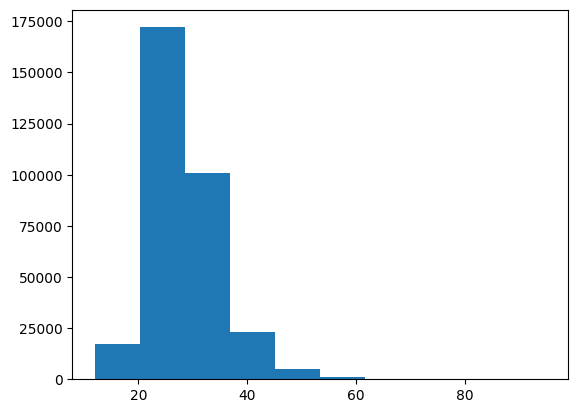

In [ ]:
plt.hist(df.BMI)

(array([131908.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 187887.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

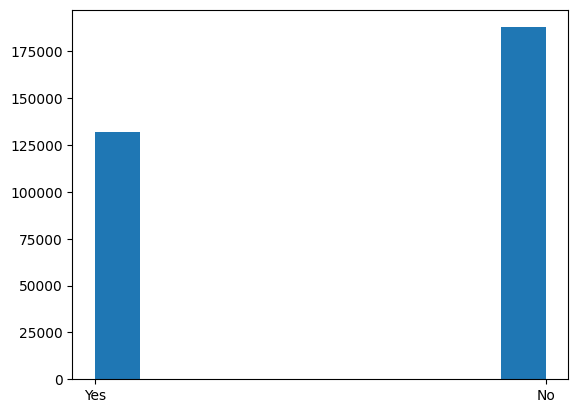

In [ ]:
plt.hist(df.Smoking)

(array([298018.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  21777.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

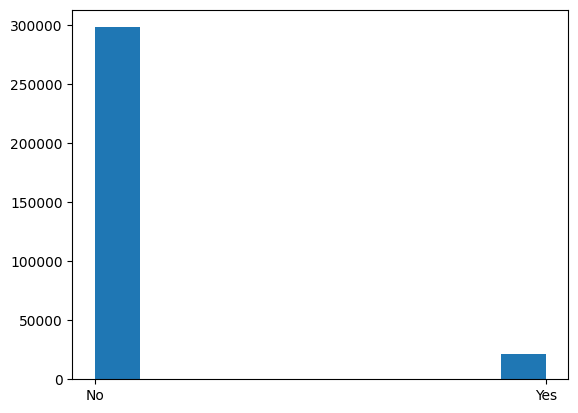

In [ ]:
plt.hist(df.AlcoholDrinking)

(array([307726.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  12069.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

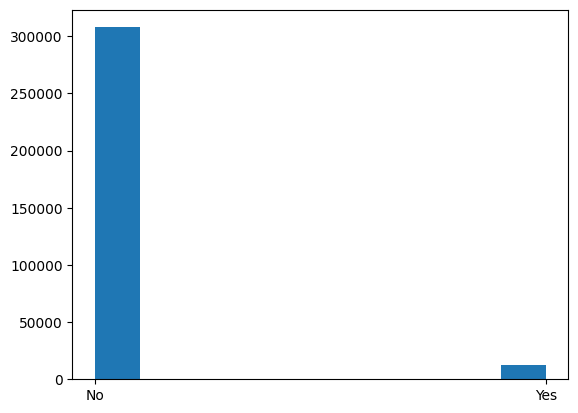

In [ ]:
plt.hist(df.Stroke)

(array([251958.,  20691.,   6823.,   5718.,   3589.,   5257.,   3418.,
           761.,   1297.,  20283.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

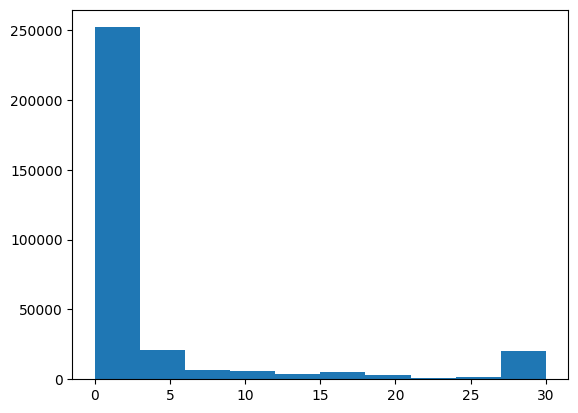

In [ ]:
plt.hist(df.PhysicalHealth)

(array([231187.,  29994.,   8132.,  10799.,   2915.,  10176.,   5663.,
           518.,   2080.,  18331.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

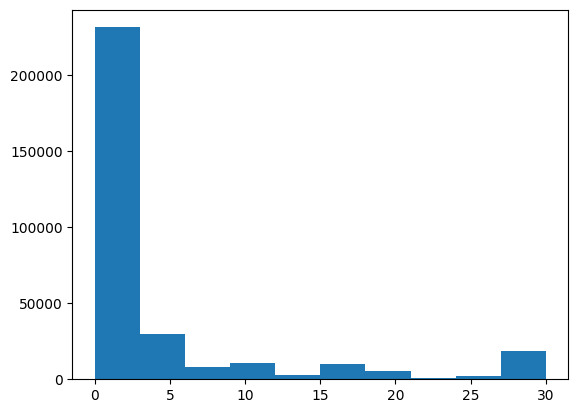

In [ ]:
plt.hist(df.MentalHealth)

(array([275385.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  44410.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

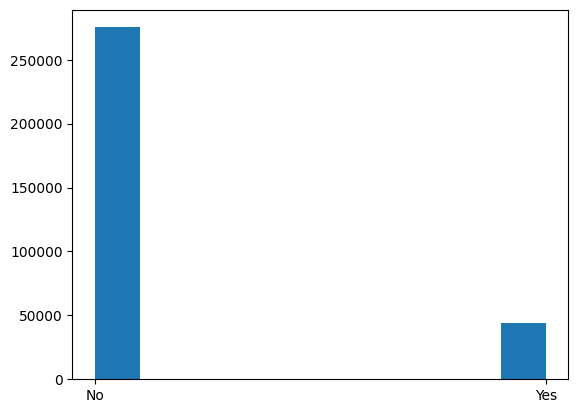

In [ ]:
plt.hist(df.DiffWalking)

(array([167805.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 151990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

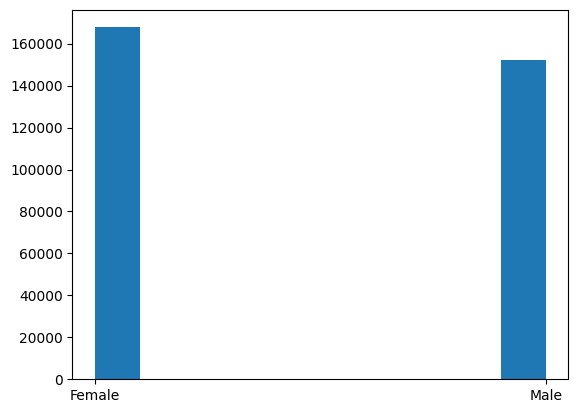

In [ ]:
plt.hist(df.Sex)

(array([245212.,      0.,  22939.,      0.,   8068.,      0.,   5202.,
             0.,  10928.,  27446.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

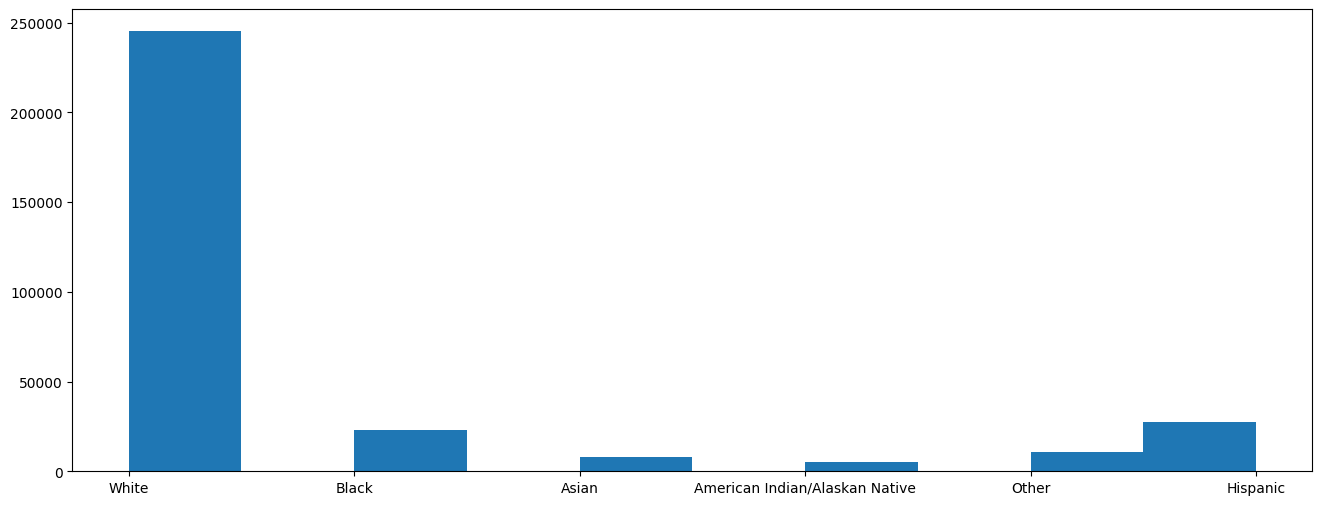

In [ ]:
fig=plt.figure(figsize=(16,6))
plt.hist(df.Race)

(array([ 40802.,      0.,      0., 269653.,      0.,      0.,   6781.,
             0.,      0.,   2559.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

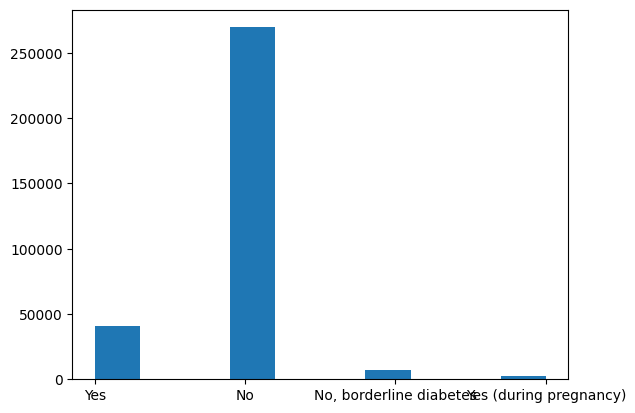

In [ ]:
plt.hist(df.Diabetic)

(array([247957.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  71838.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

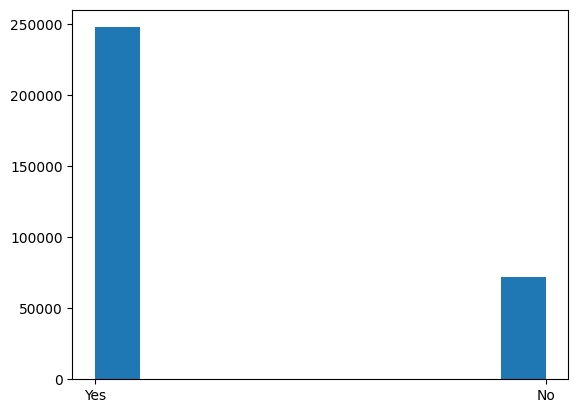

In [ ]:
plt.hist(df.PhysicalActivity)

(array([113858.,      0.,  34677.,      0.,      0.,  93129.,      0.,
         11289.,      0.,  66842.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

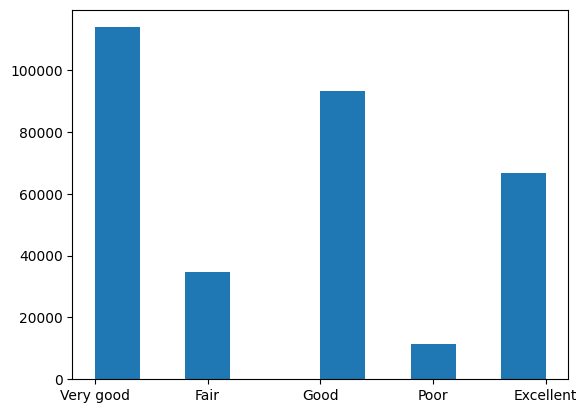

In [ ]:
plt.hist(df.GenHealth)

(array([3.33100e+03, 2.69340e+04, 1.64472e+05, 1.21439e+05, 2.62000e+03,
        3.40000e+02, 4.46000e+02, 1.05000e+02, 6.60000e+01, 4.20000e+01]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

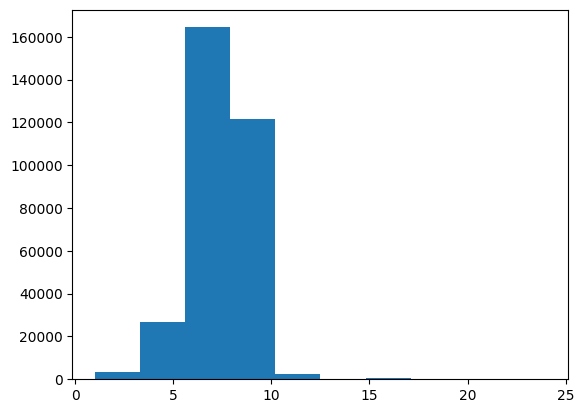

In [ ]:
plt.hist(df.SleepTime)

(array([ 42872.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 276923.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

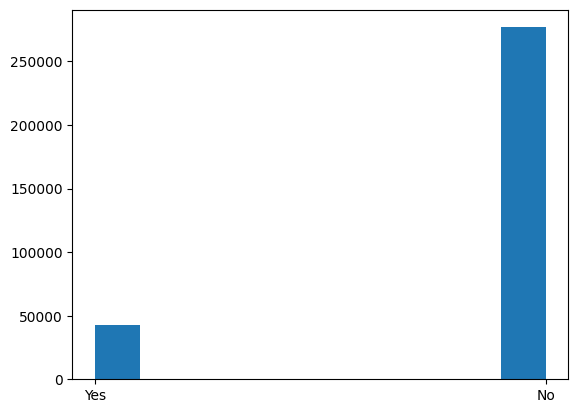

In [ ]:
plt.hist(df.Asthma)

(array([308016.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  11779.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

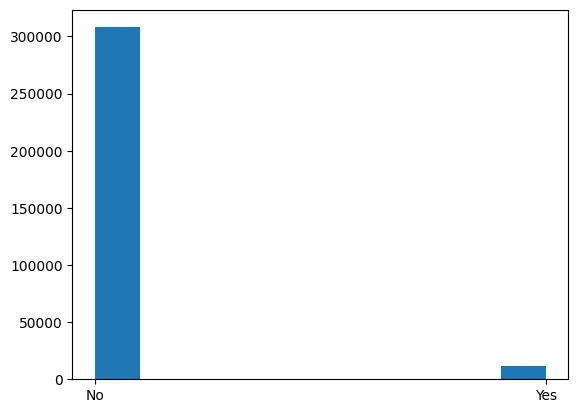

In [ ]:
plt.hist(df.KidneyDisease)

(array([ 29819.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 289976.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

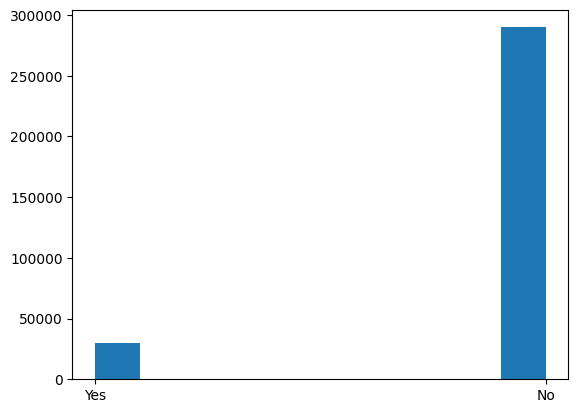

In [ ]:
plt.hist(df.SkinCancer)

([<matplotlib.patches.Wedge at 0x7f3185842550>,
 [Text(-0.5784372490702072, 0.15940623854821695, 'NO'),
  Text(0.7712496455273541, -0.21254172360722676, 'Yes')],
 [Text(-1.2050776022295984, 0.3320963303087853, '91.4%'),
  Text(1.3978899825183293, -0.38523187403809855, '8.6%')])

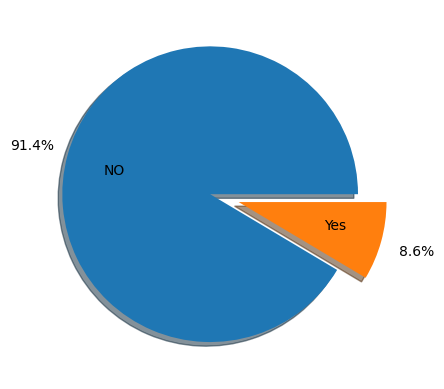

In [ ]:
labels = ['NO', 'Yes']
fig, ax = plt.subplots()
ax.pie(df.HeartDisease.value_counts(), labels=labels,autopct='%1.1f%%',pctdistance=1.25, labeldistance=.6,shadow=True,explode=(0,0.2))

Text(0.5, 1.0, 'Heart disease presence by gender')

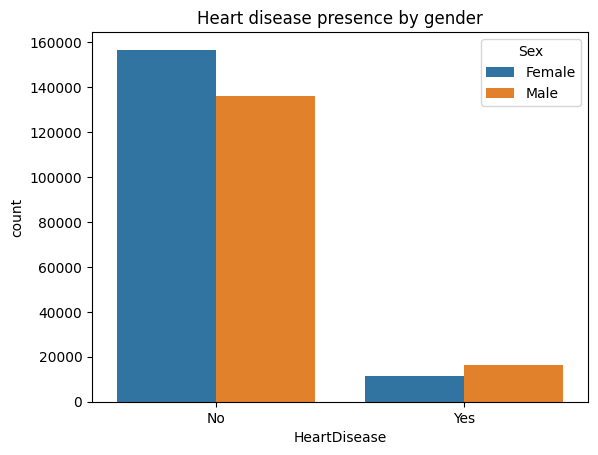

In [ ]:
f=sns.countplot(data=df,x="HeartDisease",hue="Sex")
f.set_title("Heart disease presence by gender")

<Axes: ylabel='AgeCategory'>

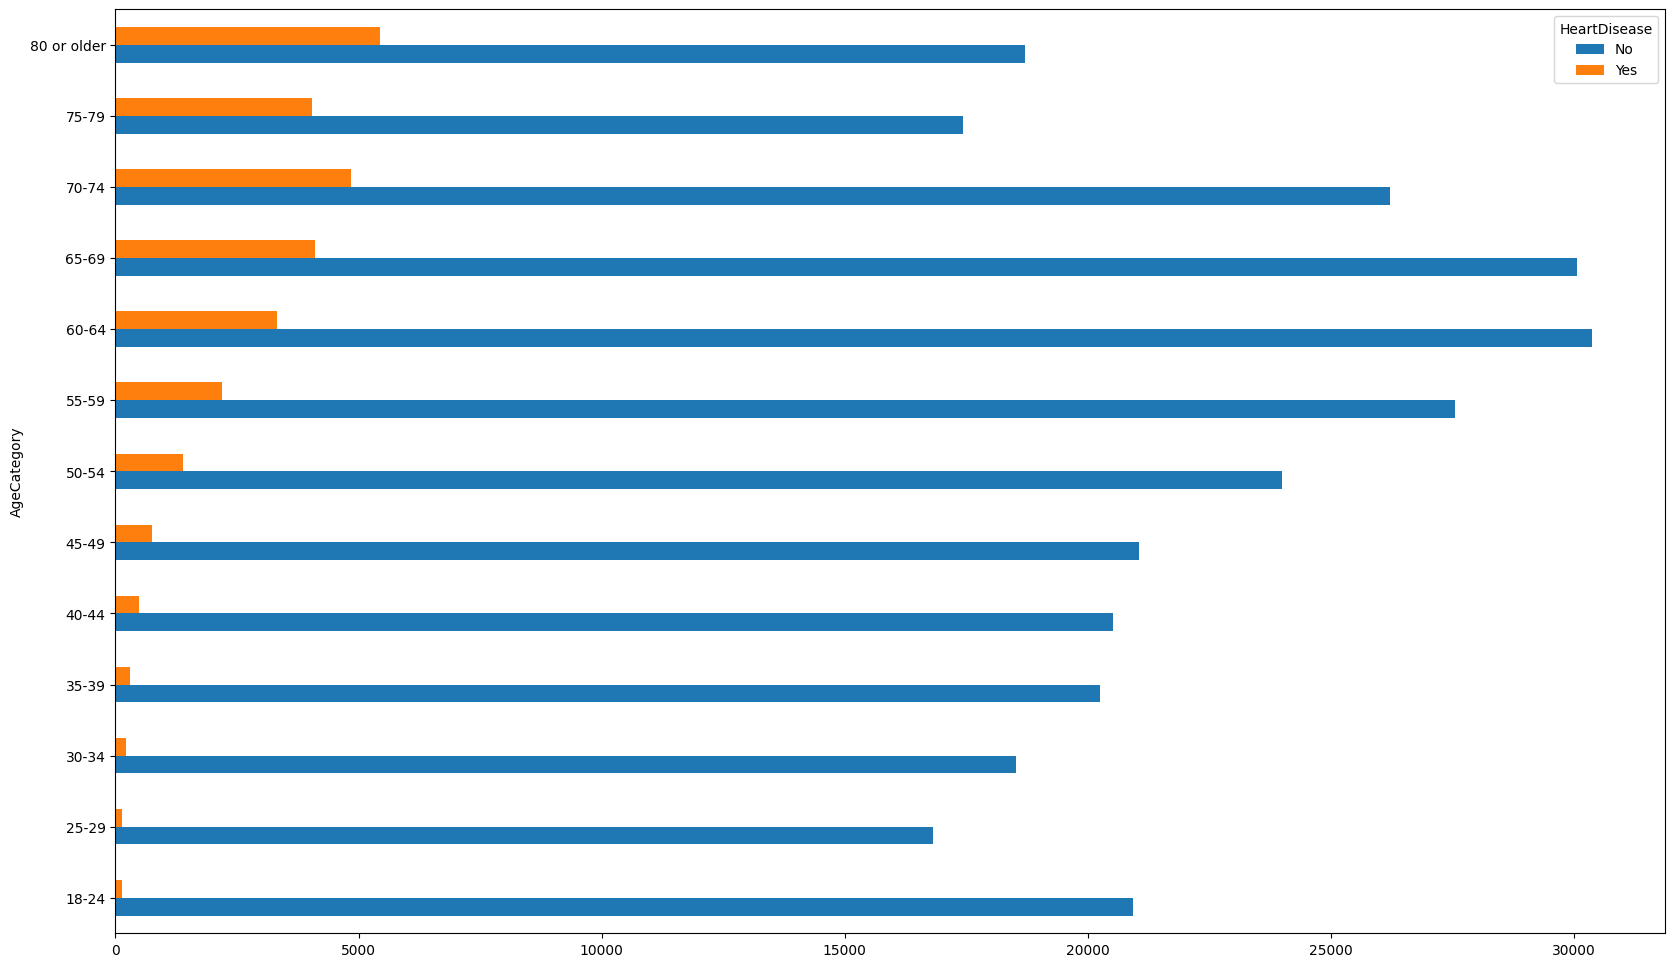

In [ ]:
pd.crosstab(df.AgeCategory ,df.HeartDisease).plot(kind="barh",figsize=(20,12))

[Text(0, 0, 'No Smoking'), Text(1, 0, 'Smoking')]

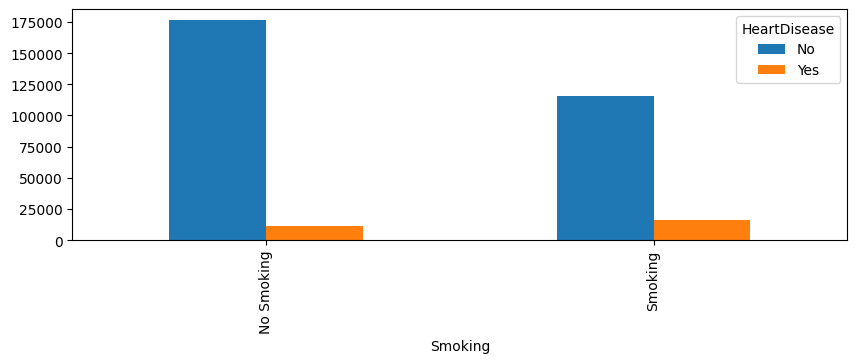

In [ ]:
f=pd.crosstab(df.Smoking,df.HeartDisease).plot(kind="bar",figsize=(10,3))
f.set_xticklabels(['No Smoking', 'Smoking'])

[Text(0, 0, 'No Alcohol Drinking'), Text(1, 0, 'Alcohol Drinking')]

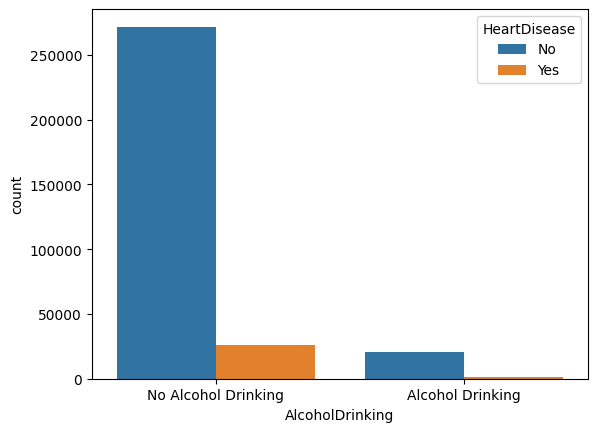

In [ ]:
f=sns.countplot(x=df.AlcoholDrinking,hue=df.HeartDisease)
f.set_xticklabels(['No Alcohol Drinking', 'Alcohol Drinking'])

[Text(0, 0, 'No Stroke'), Text(1, 0, 'Stroke')]

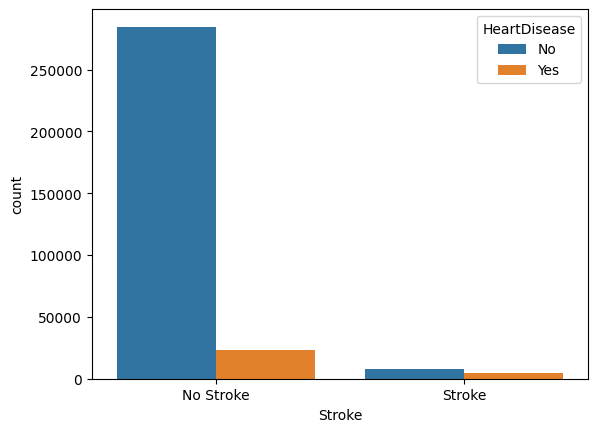

In [ ]:
f=sns.countplot(x=df.Stroke,hue=df.HeartDisease)
f.set_xticklabels(['No Stroke', 'Stroke'])

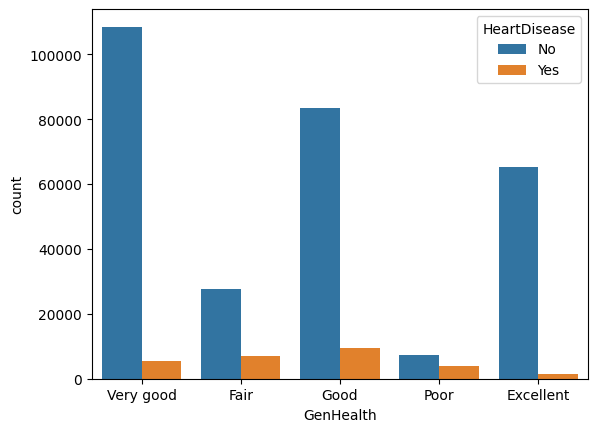

In [ ]:
sns.countplot(x=df.GenHealth,hue=df.HeartDisease)

<Axes: xlabel='DiffWalking', ylabel='count'>

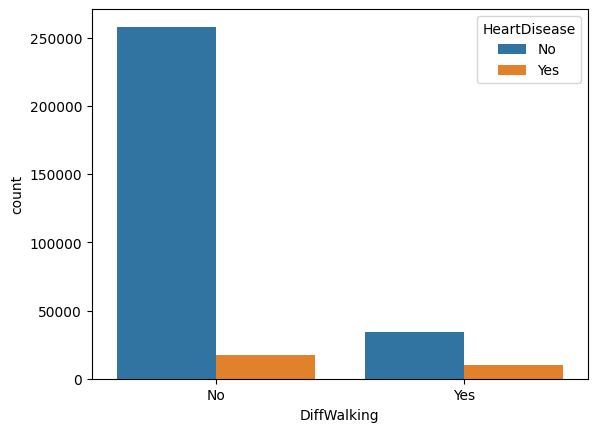

In [ ]:
sns.countplot(x=df.DiffWalking,hue=df.HeartDisease)

<Axes: xlabel='Diabetic', ylabel='count'>

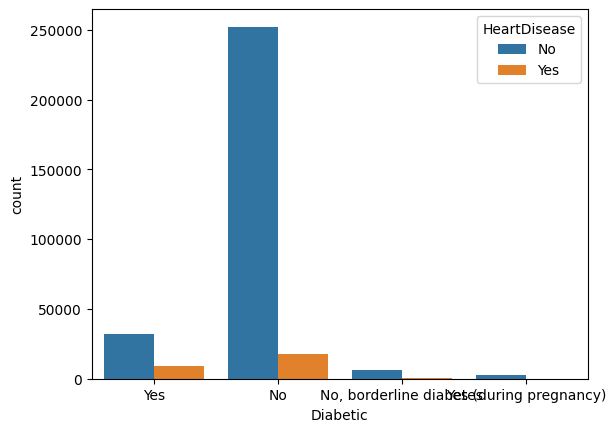

In [ ]:
sns.countplot(x=df.Diabetic,hue=df.HeartDisease)

<Axes: xlabel='Sex', ylabel='count'>

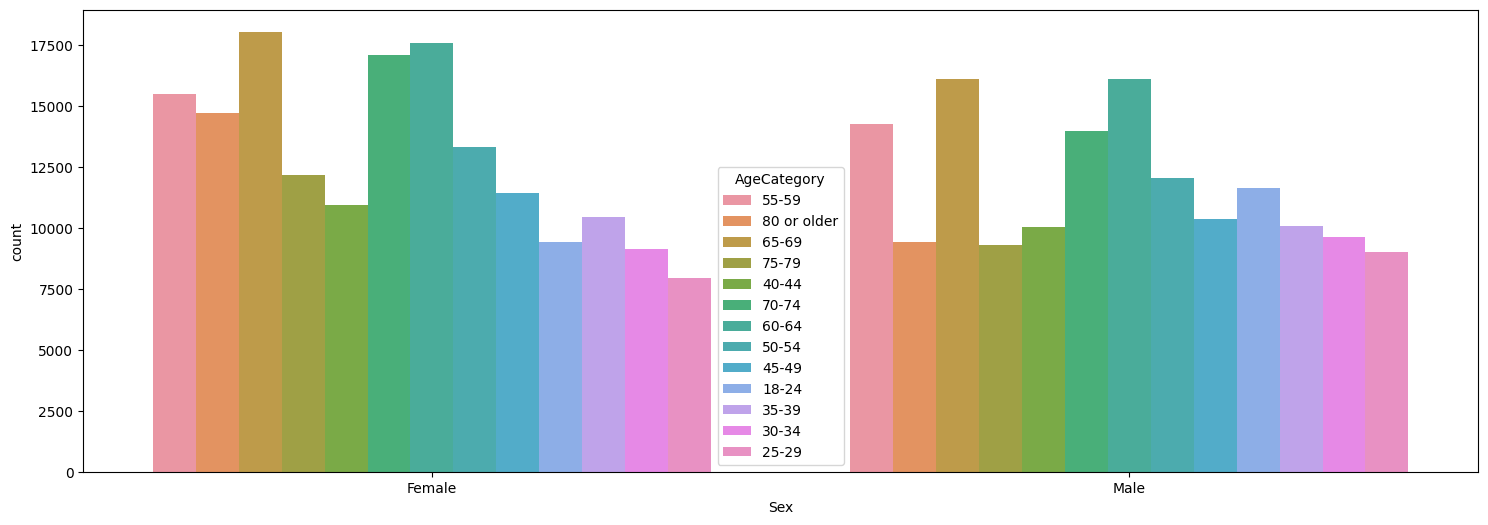

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=df.Sex,hue=df.AgeCategory)

<Axes: xlabel='SleepTime', ylabel='count'>

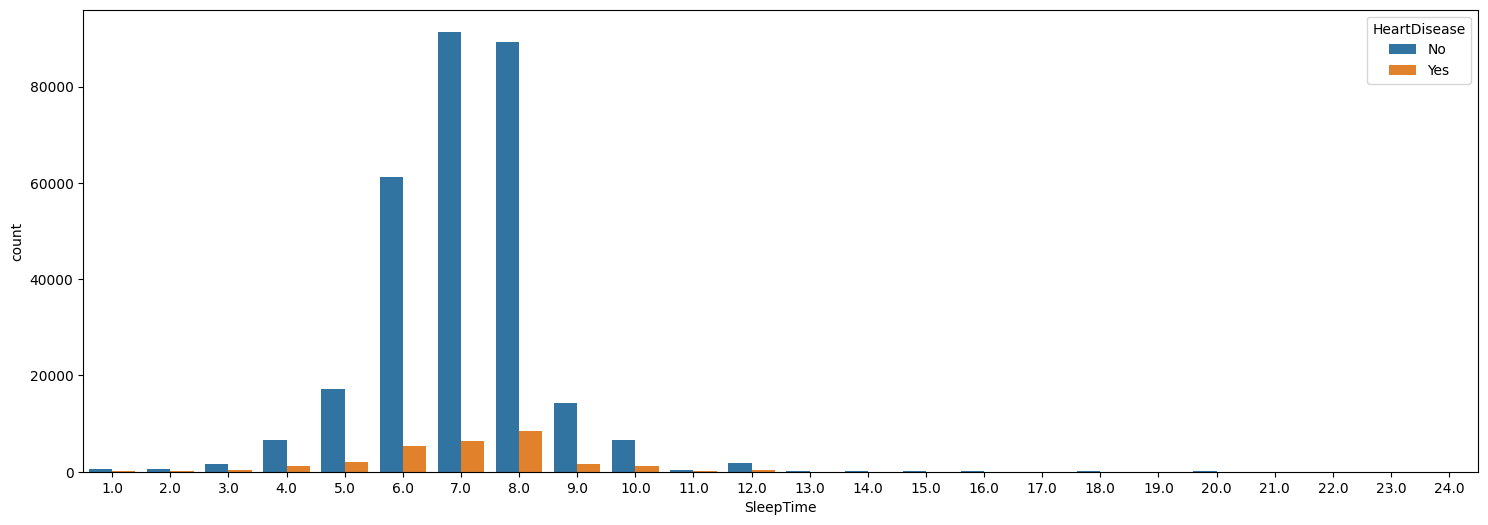

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=df.SleepTime,hue=df.HeartDisease)

<Axes: xlabel='Asthma', ylabel='count'>

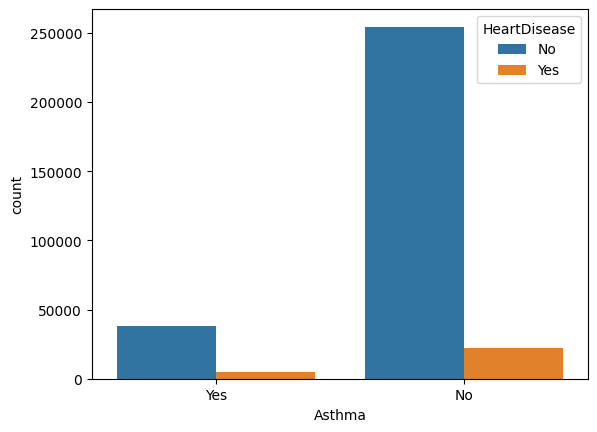

In [ ]:
sns.countplot(x=df.Asthma ,hue=df.HeartDisease)

<Axes: xlabel='KidneyDisease', ylabel='count'>

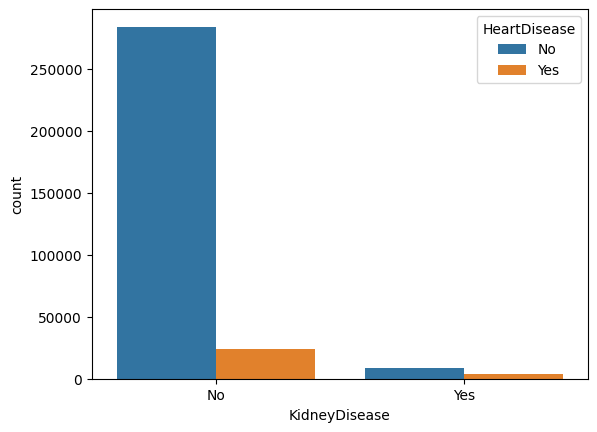

In [ ]:
sns.countplot(x=df.KidneyDisease ,hue=df.HeartDisease)

<Axes: xlabel='SkinCancer', ylabel='count'>

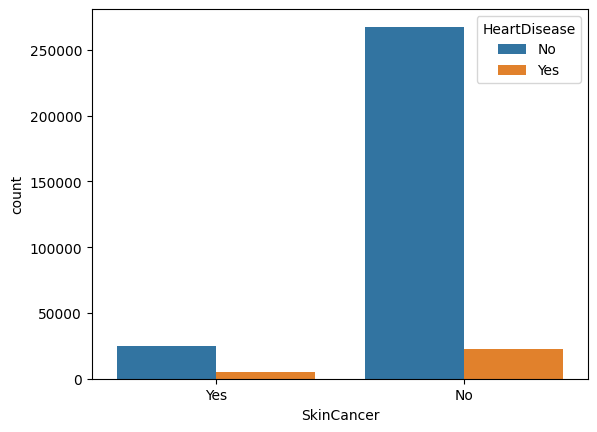

In [ ]:
sns.countplot(x=df.SkinCancer ,hue=df.HeartDisease)

In [ ]:
df["Smoking"]=df["Smoking"].replace(["Yes","No"],[1,0])

In [ ]:
df["AlcoholDrinking"]=df["AlcoholDrinking"].replace(["Yes","No"],[1,0])

In [ ]:
df["Stroke"]=df["Stroke"].replace(["Yes","No"],[1,0])

In [ ]:
df["DiffWalking"]=df["DiffWalking"].replace(["Yes","No"],[1,0])

In [ ]:
df["Sex"]=df["Sex"].replace(["Female","Male"],[1,0])

In [ ]:
df["PhysicalActivity"]=df["PhysicalActivity"].replace(["Yes","No"],[1,0])

In [ ]:
df["Asthma"]=df["Asthma"].replace(["Yes","No"],[1,0])

In [ ]:
df["KidneyDisease"]=df["KidneyDisease"].replace(["Yes","No"],[1,0])

In [ ]:
df["SkinCancer"]=df["SkinCancer"].replace(["Yes","No"],[1,0])

In [ ]:
df["AgeCategory"]=df["AgeCategory"].replace(["18-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80 or older"],[1,2,3,4,5,6,7,8,9,10,11,12,13])  

In [ ]:
df["Diabetic"]=df["Diabetic"].replace(["Yes","No","No, borderline diabetes","Yes (during pregnancy)"],[1,0,10,20])

In [ ]:
df["GenHealth"]=df["GenHealth"].replace(["Very good","Fair","Good","Poor","Excellent"],[1,2,3,4,5])

In [ ]:
df["HeartDisease"]=df["HeartDisease"].replace(["Yes","No"],[1,0])

In [ ]:
df['Race']=df['Race'].replace(['White','Hispanic','Black','Asian','American Indian/Alaskan Native','Other'],[1,2,3,4,5,6])

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,8,1,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,13,1,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,10,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,12,1,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,5,1,0,1,1,8.0,0,0,0


In [ ]:
#data=pd.get_dummies(df)

In [ ]:
#data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,8,1,1,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,13,1,0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,10,1,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,12,1,0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,5,1,0,1,1,8.0,0,0,0


<Axes: >

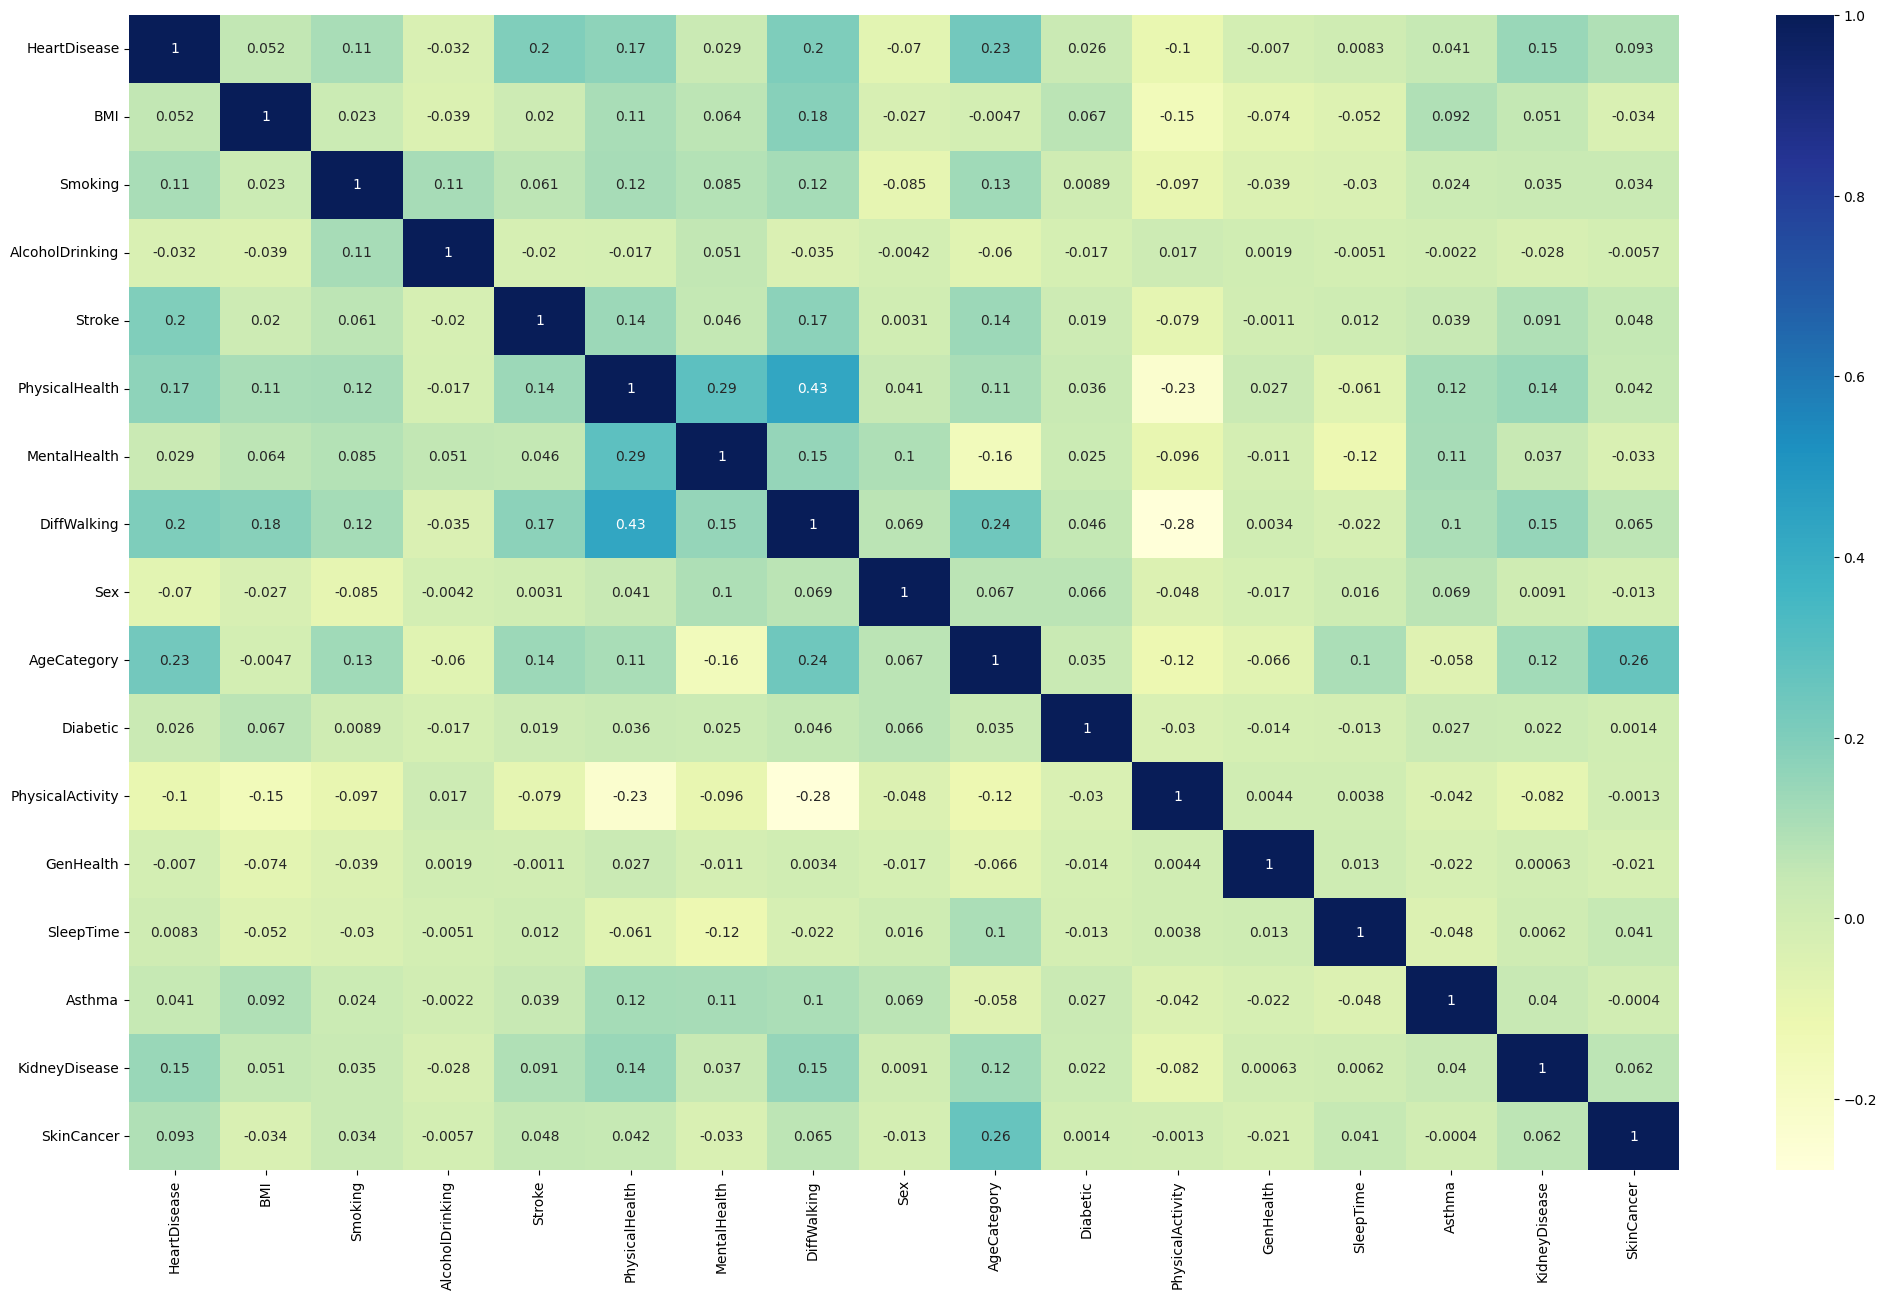

In [ ]:
plt.figure(figsize=(25,15))
corr=data.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

In [ ]:
data=df.drop(["Race"],axis=1)

In [ ]:
data.shape

(319795, 17)

In [ ]:
X=data.drop(["HeartDisease"],axis=1)
y=data["HeartDisease"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=2)

In [ ]:
scaler=StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train))
x_test=pd.DataFrame(scaler.fit_transform(x_test))

X.shape,y.shape,x_train.shape,x_test.shape,y_train.shape,y_test.shape

((319795, 16), (319795,), (255836, 16), (63959, 16), (255836,), (63959,))

In [ ]:
lin_model=LogisticRegression(solver="lbfgs",penalty="l2")
lin_model.fit(x_train,y_train)
print("score of linear model : ",lin_model.score(x_train,y_train))

score of linear model :  0.9149845995090605


In [ ]:
tree_model=DecisionTreeClassifier()
tree_model.fit(x_train,y_train)
print("score of tree model : ",tree_model.score(x_train,y_train))

score of tree model :  0.9961576947732141


In [ ]:
forest_model=RandomForestClassifier()
forest_model.fit(x_train,y_train)
print("score of forest model : ",forest_model.score(x_train,y_train))

score of forest model :  0.9961068809706218


In [ ]:
nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
print("score of Gaussian model : ",nb_model.score(x_train,y_train))

score of Gaussian model :  0.8502204537281696


In [ ]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
print("score of KNN model : ",knn_model.score(x_train,y_train))

score of KNN model :  0.9242092590565831


In [ ]:
lin_model_pred=lin_model.predict(x_test)
tree_model_pred=tree_model.predict(x_test)
forest_model_pred=forest_model.predict(x_test)
nb_model_pred=nb_model.predict(x_test)
knn_model_pred=knn_model.predict(x_test)

In [ ]:
def drow_conf_matrix(predict,actuall=y_test):
    conf=confusion_matrix(actuall,predict)
    sns.heatmap(conf,annot=True,fmt="d", annot_kws={"size": 24})

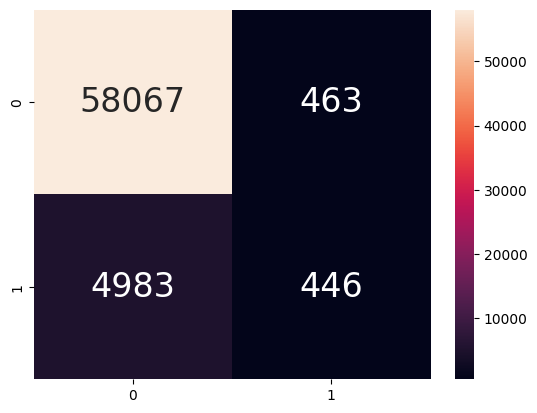

In [ ]:
drow_conf_matrix(lin_model_pred)

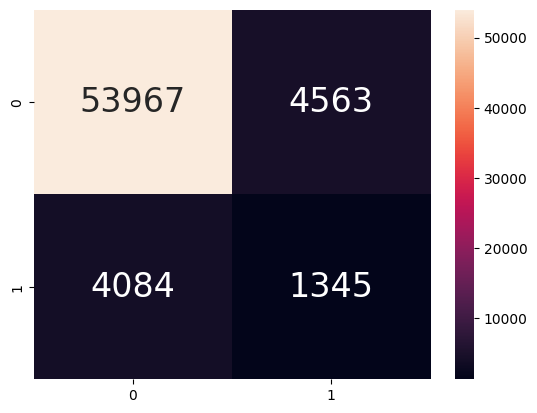

In [ ]:
drow_conf_matrix(tree_model_pred)

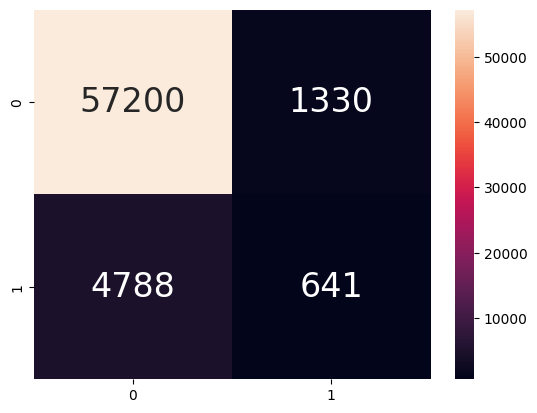

In [ ]:
drow_conf_matrix(forest_model_pred)

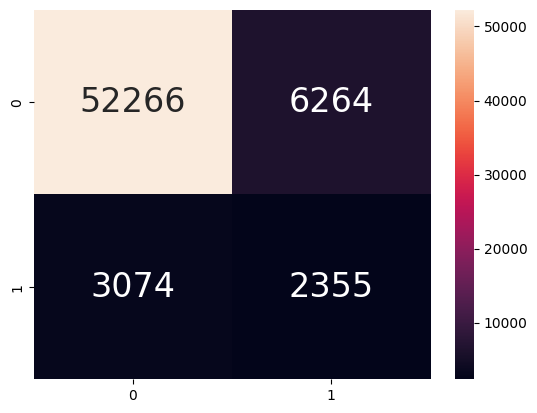

In [ ]:
drow_conf_matrix(nb_model_pred)

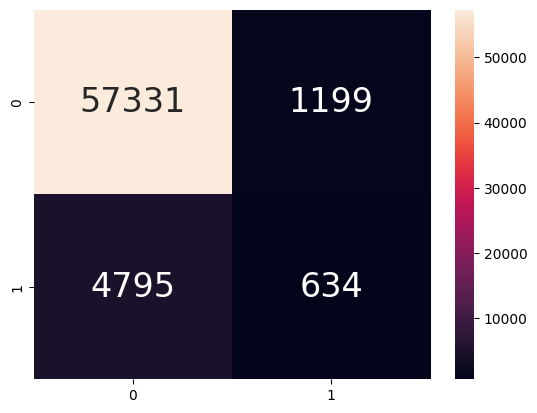

In [ ]:
drow_conf_matrix(knn_model_pred)

In [ ]:
models={"linear":lin_model_pred,
        "tree":tree_model_pred,
        "forest":forest_model_pred,
        "GaussianNB":nb_model_pred,
        "knn":knn_model_pred}

In [ ]:
for name,pred in models.items():
    print(name,"Model")
    print(classification_report(y_test,pred))
    print("#"*70)

linear Model
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58530
           1       0.49      0.08      0.14      5429

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.89     63959

######################################################################
tree Model
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     58530
           1       0.23      0.25      0.24      5429

    accuracy                           0.86     63959
   macro avg       0.58      0.58      0.58     63959
weighted avg       0.87      0.86      0.87     63959

######################################################################
forest Model
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58530
           1       0.33      0.12      0.17      5429

   